## Exercice 1:


<!-- show bird image centered -->
<p align="center">
  <img src="bird_small.png" width="256" height="256">
</p>




Dans cet exercice, vous allez appliquer les K-means à la compression d'images.
Dans une représentation directe d'une image en couleur sur 24 bits, chaque pixel est
représenté par trois entiers non signés de 8 bits (allant de 0 à 255) qui spécifient les
valeurs d'intensité rouge, verte et bleue. Ce codage est souvent appelé le codage
RVB. Notre image contient des milliers de couleurs, et dans cette partie de
l'exercice, vous allez réduire le nombre de couleurs à 16 couleurs.
En effectuant cette réduction, il est possible de représenter (compresser) la photo
d'une manière efficace. Plus précisément, vous n'avez besoin de stocker que les
valeurs RVB des 16 couleurs sélectionnées, et pour chaque pixel de l'image, vous
n'avez plus qu'à stocker l'index de la couleur à cet endroit (où seulement 4 bits sont
nécessaires pour représenter 16 possibilités).
Dans cet exercice, vous allez utiliser l'algorithme K-means pour sélectionner les 16
couleurs qui seront utilisées pour représenter l'image compressée. Concrètement,
vous allez traiter chaque pixel de l'image originale comme un exemple de données
et utiliser l'algorithme des moyennes K pour trouver les 16 couleurs qui regroupent le
mieux (cluster) les pixels dans l'espace RVB à 3 dimensions. Une fois que vous
aurez calculé les centroïdes des groupes sur l'image, vous utiliserez les 16 couleurs
pour remplacer les pixels de l'image originale.
assigner chaque position de pixel à son centroïde le plus proche en utilisant la
fonction findClosestCentroids. Cela vous permet de représenter l'image originale à
l'aide des affectations des centroïdes de chaque pixel. Remarquez que vous avez
considérablement réduit le nombre de bits nécessaires pour décrire l'image. L'image
d'origine nécessitait 24 bits pour chacun des 128×128 emplacements de pixels, soit
une taille totale de 128 × 128 × 24 = 393 216 bits. La nouvelle représentation
nécessite un stockage supplémentaire sous la forme d'un dictionnaire de 16
couleurs, chacune nécessitant 24 bits, mais l'image elle-même ne nécessite alors
que 4 bits par emplacement de pixel. Le nombre final de bits utilisés est donc de 16
× 24 + 128 × 128 × 4 = 65 920 bits, ce qui correspond à une compression de l'image
originale d'un facteur 6 environ.



- importer les bibliothèques nécessaires

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

- charger l'image

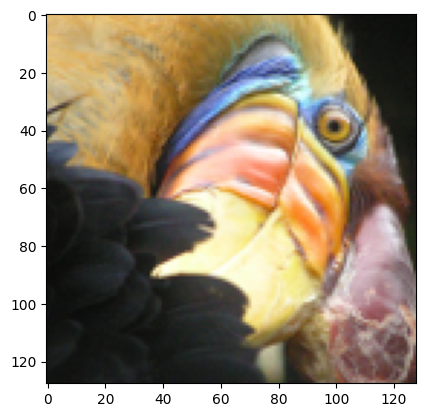

In [3]:
# Load the image
image = Image.open('bird_small.png')
image_np = np.array(image)

# show the image
plt.imshow(image_np)


- reshappez l'image pour créer une matrice de pixels

In [4]:
pixels = image_np.reshape(-1, 3)
print("original shape:", image_np.shape)
print("reshaped shape:", pixels.shape)

original shape: (128, 128, 3)
reshaped shape: (16384, 3)


- appliquer l'algorithme K-means

In [5]:
# Perform K-means clustering to form k clusters
kmeans = KMeans(n_clusters=16)
kmeans.fit(pixels)
# show the cluster centers
print(kmeans.cluster_centers_)

[[244.88660802 217.69892473 161.00879765]
 [ 40.82345901  41.4266906   39.32375823]
 [165.24970273 119.48156956  51.09631391]
 [129.36111111 159.21875    205.80208333]
 [ 88.00600601  99.6996997  130.41741742]
 [250.15377532 241.70902394 207.48710866]
 [157.75672215 139.8553137  127.40717029]
 [205.92495637 196.54275742 200.21640489]
 [233.92110874 145.64605544  64.23454158]
 [222.74668351 183.04358812 114.63171194]
 [114.86602358  84.87888532  55.55519829]
 [135.9583815  110.96184971  96.94450867]
 [ 21.37418514  23.14471969  20.5309648 ]
 [192.48542805 153.93442623  86.54918033]
 [190.85714286 169.36111111 146.25132275]
 [ 71.05413386  64.71358268  63.43307087]]


Enfin, vous pouvez visualiser les effets de la compression en reconstruisant l'image en vous
basant uniquement sur les assignations des centroïdes. Plus précisément, vous pouvez
remplacer l'emplacement de chaque pixel par la moyenne du centroïde qui lui a été attribué.
La figure 3 montre la reconstruction que nous avons obtenue.

- remplacer les pixels par les centroïdes les plus proches

In [6]:
compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
compressed_pixels

array([[222.74668351, 183.04358812, 114.63171194],
       [222.74668351, 183.04358812, 114.63171194],
       [222.74668351, 183.04358812, 114.63171194],
       ...,
       [ 40.82345901,  41.4266906 ,  39.32375823],
       [ 40.82345901,  41.4266906 ,  39.32375823],
       [ 40.82345901,  41.4266906 ,  39.32375823]])

- reshaper l'image

In [7]:
compressed_image = compressed_pixels.reshape(image_np.shape)
compressed_image

array([[[222.74668351, 183.04358812, 114.63171194],
        [222.74668351, 183.04358812, 114.63171194],
        [222.74668351, 183.04358812, 114.63171194],
        ...,
        [ 21.37418514,  23.14471969,  20.5309648 ],
        [ 21.37418514,  23.14471969,  20.5309648 ],
        [ 21.37418514,  23.14471969,  20.5309648 ]],

       [[222.74668351, 183.04358812, 114.63171194],
        [222.74668351, 183.04358812, 114.63171194],
        [222.74668351, 183.04358812, 114.63171194],
        ...,
        [ 21.37418514,  23.14471969,  20.5309648 ],
        [ 21.37418514,  23.14471969,  20.5309648 ],
        [ 21.37418514,  23.14471969,  20.5309648 ]],

       [[222.74668351, 183.04358812, 114.63171194],
        [222.74668351, 183.04358812, 114.63171194],
        [222.74668351, 183.04358812, 114.63171194],
        ...,
        [ 21.37418514,  23.14471969,  20.5309648 ],
        [ 21.37418514,  23.14471969,  20.5309648 ],
        [ 21.37418514,  23.14471969,  20.5309648 ]],

       ...,

      

- convertir l'image en uint8

In [8]:
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

- créer une nouvelle image à partir des pixels

In [9]:
compressed_image = Image.fromarray(compressed_image)

- afficher l'image originale et la nouvelle image

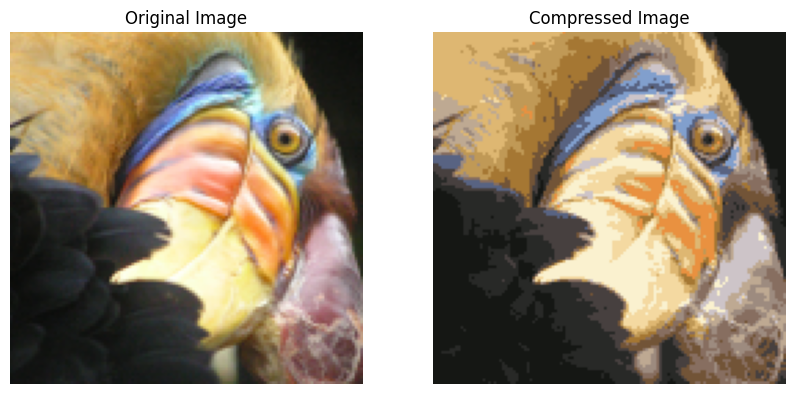

In [10]:
# - afficher l'image originale et la nouvelle image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(compressed_image)
ax[1].set_title('Compressed Image')
for a in ax:
    a.axis('off')
plt.show()


compressed_image.save('bird_small_compressed.png')
